In [1]:
#importing libraries
import pandas as pd
import wrds

In [2]:
#connecting WRDS using your ID and password
conn=wrds.Connection()

Enter your WRDS username [pragathi]: pragathi06
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  n


You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [3]:
#download the company basic info data- columns including 'siccd', 'permno,' 'ticker','comnam', 'cusip', and 'namedt'
info_crsp=conn.get_table(library='crsp', table='stocknames', columns =['siccd', 'permno', 'ticker','comnam', 'cusip','namedt'])

In [4]:
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
1,4920,10001,GFGC,GREAT FALLS GAS CO,36720410,1986-01-09
2,4920,10001,EWST,ENERGY WEST INC,36720410,1993-11-22
3,4920,10001,EWST,ENERGY WEST INC,36720410,2008-02-05
4,4920,10001,EGAS,ENERGY INC,36720410,2009-08-04
...,...,...,...,...,...,...
83275,9999,93434,SANW,S & W SEED CO,78513530,2010-06-14
83276,9999,93434,SANW,S & W SEED CO,78513530,2024-10-18
83277,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14
83278,9999,93436,TSLA,TESLA MOTORS INC,88160R10,2010-06-29


In [5]:
#change the format of 'namedt' to Panda’s date format
info_crsp['namedt']= pd.to_datetime(info_crsp['namedt'])
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
1,4920,10001,GFGC,GREAT FALLS GAS CO,36720410,1986-01-09
2,4920,10001,EWST,ENERGY WEST INC,36720410,1993-11-22
3,4920,10001,EWST,ENERGY WEST INC,36720410,2008-02-05
4,4920,10001,EGAS,ENERGY INC,36720410,2009-08-04
...,...,...,...,...,...,...
83275,9999,93434,SANW,S & W SEED CO,78513530,2010-06-14
83276,9999,93434,SANW,S & W SEED CO,78513530,2024-10-18
83277,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14
83278,9999,93436,TSLA,TESLA MOTORS INC,88160R10,2010-06-29


In [6]:
info_crsp['namedt'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 83280 entries, 0 to 83279
Series name: namedt
Non-Null Count  Dtype         
--------------  -----         
83280 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 650.8 KB


In [7]:
#Information of the data including the list of columns, data types of columns, the number of rows, memory etc. 
info_crsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83280 entries, 0 to 83279
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   siccd   83280 non-null  int64         
 1   permno  83280 non-null  int64         
 2   ticker  78325 non-null  object        
 3   comnam  83280 non-null  object        
 4   cusip   83280 non-null  object        
 5   namedt  83280 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.8+ MB


In [8]:
#check duplicates based on 'permno’  (i.e., count the total number of duplicates)
info_crsp.duplicated('permno').value_counts()

True     44408
False    38872
Name: count, dtype: int64

In [9]:
#sort the data based on 'permno’ and 'namedt' (hint: sort_values())
info_crsp = info_crsp.sort_values(by=['permno', 'namedt'])
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
1,4920,10001,GFGC,GREAT FALLS GAS CO,36720410,1986-01-09
2,4920,10001,EWST,ENERGY WEST INC,36720410,1993-11-22
3,4920,10001,EWST,ENERGY WEST INC,36720410,2008-02-05
4,4920,10001,EGAS,ENERGY INC,36720410,2009-08-04
...,...,...,...,...,...,...
83275,9999,93434,SANW,S & W SEED CO,78513530,2010-06-14
83276,9999,93434,SANW,S & W SEED CO,78513530,2024-10-18
83277,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14
83278,9999,93436,TSLA,TESLA MOTORS INC,88160R10,2010-06-29


In [10]:
#Keep only the last one if there are duplicates based on 'permno’
info_crsp=info_crsp.drop_duplicates('permno',keep='last')
info_crsp

,siccd,permno,ticker,comnam,cusip,namedt
0,3990,10000,OMFGA,OPTIMUM MANUFACTURING INC,68391610,1986-01-07
6,4925,10001,EGAS,GAS NATURAL INC,36720410,2010-07-09
10,6020,10002,BTFG,BANCTRUST FINANCIAL GROUP INC,05978R10,2002-05-15
12,6020,10003,GCBK,GREAT COUNTRY BK ASONIA CT,39031810,1987-04-01
13,5330,10004,CLSO,CLOSE OUTS PLUS INC,18906310,1986-01-15
...,...,...,...,...,...,...
83271,7389,93432,JGBO,JIANGBO PHARMACEUTICALS INC,47737R10,2010-06-08
83274,9999,93433,VLTC,VOLTARI CORP,92870X30,2013-04-24
83276,9999,93434,SANW,S & W SEED CO,78513530,2024-10-18
83277,6163,93435,SCEI,SINO CLEAN ENERGY INC,82936G20,2010-06-14


In [11]:
#check again if there are duplicates based on all columns
info_crsp.duplicated('permno').value_counts()

False    38872
Name: count, dtype: int64

In [12]:
#Information of the data, including the list of columns, data types of columns, the number of rows, memory, etc. 

In [13]:
info_crsp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38872 entries, 0 to 83279
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   siccd   38872 non-null  int64         
 1   permno  38872 non-null  int64         
 2   ticker  37859 non-null  object        
 3   comnam  38872 non-null  object        
 4   cusip   38872 non-null  object        
 5   namedt  38872 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.1+ MB


In [14]:
#Show the unique number of companies 
unique_companies = info_crsp['permno'].nunique()
unique_companies

38872

In [15]:
#subset “permno” from the data created earlier.
#Export the company basic info data to collect the abnormal return data via WRDS.

crsp_out = info_crsp[['permno']]

In [16]:
#add event date

crsp_out['eventdate'] = '2022-02-24'  

/var/folders/3p/z9wtcy0n5gn8qfr58l89gwsh0000gn/T/ipykernel_59018/2975602770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crsp_out['eventdate'] = '2022-02-24'


In [17]:
#Show the top five row of the data
crsp_out.head(5)

,permno,eventdate
0,10000,2022-02-24
6,10001,2022-02-24
10,10002,2022-02-24
12,10003,2022-02-24
13,10004,2022-02-24


In [18]:
#export the data to your local computer.

In [19]:
loc=r'/Users/pragathi/Downloads'

In [20]:
fname=loc+'/Russia-Ukrain-War_permno_test.txt'

In [21]:
crsp_out.to_csv(fname, header=False, index=False, sep=' ')

In [22]:
#We will be downloading the abnormal return data from WRDS and post the data on WRDS and read it from GitHub

In [23]:
#read your file from your GitHub

url='https://github.com/pragathi-somashekar/Financial-Data-Analysis-and-Visualization/blob/main/Russia_Ukrain_War__edate.csv?raw=True'

In [24]:
abcar=pd.read_csv(url)
abcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8514 entries, 0 to 8513
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Model      8514 non-null   object 
 1   permno     8514 non-null   int64  
 2   evtdate    8514 non-null   object 
 3   cret       8513 non-null   float64
 4   car        8513 non-null   float64
 5   bhar       8513 non-null   float64
 6   nrets      8514 non-null   int64  
 7   nrets_est  8514 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 532.3+ KB


In [25]:
#show the first five row of the data
abcar.head(5)

,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100
4,Market-Adjusted Model,10051,2022-02-24,0.115951,0.171434,0.173823,21,100


In [26]:
# this represent a cross-sectional data as it reperesent a multiple entities at specific time.

In [27]:
#now we check for duplicates and nunique companies using permno value

In [28]:
#check duplicates using “permno”
abcar.duplicated(['permno'])

0       False
1       False
2       False
3       False
4       False
        ...  
8509    False
8510    False
8511    False
8512    False
8513    False
Length: 8514, dtype: bool

In [29]:
abcar.duplicated('permno').value_counts()

False    8514
Name: count, dtype: int64

In [30]:
#show the unique number of companies.
abcar['permno'].nunique()

8514

In [31]:
#now we merge info_crsp with abcar using inner merging by permno

In [32]:
crsp = abcar.merge(info_crsp, how="inner", on="permno")
crsp

,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est,siccd,ticker,comnam,cusip,namedt
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100,2052,JJSF,J & J SNACK FOODS CORP,46603210,2000-08-01
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100,5094,ELA,ENVELA CORP,29402E10,2019-12-18
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100,3670,PLXS,PLEXUS CORP,72913210,1986-02-05
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100,2060,RMCF,ROCKY MOUNTAIN CHOC FAC INC NEW,77467X10,2015-03-02
4,Market-Adjusted Model,10051,2022-02-24,0.115951,0.171434,0.173823,21,100,4813,HNGR,HANGER INC,41043F20,2020-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8509,Market-Adjusted Model,93426,2022-02-24,-0.023935,0.035815,0.033938,21,100,3676,VPG,VISHAY PRECISION GROUP INC,92835K10,2010-07-07
8510,Market-Adjusted Model,93427,2022-02-24,-0.024695,0.035728,0.033178,21,100,3826,FN,FABRINET,G3323L10,2024-06-20
8511,Market-Adjusted Model,93429,2022-02-24,-0.065287,-0.008288,-0.007414,21,100,6211,CBOE,C B O E GLOBAL MARKETS INC,12503M10,2024-06-21
8512,Market-Adjusted Model,93434,2022-02-24,0.033755,0.096910,0.091628,21,100,9999,SANW,S & W SEED CO,78513530,2024-10-18


In [33]:
abcar.head(5)

,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100
4,Market-Adjusted Model,10051,2022-02-24,0.115951,0.171434,0.173823,21,100


In [34]:
# collecting compustat data

comp = conn.raw_sql('''select sich, gvkey, datadate, conm, revt, ni from comp.funda 
                        where datafmt = 'STD' and consol = 'C'and indfmt = 'INDL'
                        ''', date_cols=['datadate'])
#generating year
comp['year']=pd.DatetimeIndex(comp['datadate']).year

#linkage
url='https://github.com/kyoon5/shared/blob/main/link.csv?raw=true'
link=pd.read_csv(url)
link['gvkey'] = link['gvkey'].astype(str).str.zfill(6)
link['linkdt']=pd.to_datetime(link['linkdt'])
link['linkenddt']=pd.to_datetime(link['linkenddt'])

#adding permno for crsp data
comp2 = (
    comp.merge(link, how='inner', on='gvkey')  # Join on gvkey
    .query("datadate >= linkdt and (datadate <= linkenddt or linkenddt.isna())")  # Apply date range filter
    .assign(permno=lambda x: x['lpermno'])  # Select permno
    .sort_values(['gvkey', 'datadate'])  # Sort by gvkey and datadate
)

comp2=comp2[['sich', 'gvkey','datadate','conm','revt','ni','year','permno']]

In [35]:
crsp['year']=pd.DatetimeIndex(crsp['evtdate']).year

In [36]:
crsp_comp=crsp.merge(comp2,how="inner",on=['permno','year'])
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5311 non-null   object        
 1   permno     5311 non-null   int64         
 2   evtdate    5311 non-null   object        
 3   cret       5310 non-null   float64       
 4   car        5310 non-null   float64       
 5   bhar       5310 non-null   float64       
 6   nrets      5311 non-null   int64         
 7   nrets_est  5311 non-null   int64         
 8   siccd      5311 non-null   int64         
 9   ticker     5311 non-null   object        
 10  comnam     5311 non-null   object        
 11  cusip      5311 non-null   object        
 12  namedt     5311 non-null   datetime64[ns]
 13  year       5311 non-null   int32         
 14  sich       4842 non-null   float64       
 15  gvkey      5311 non-null   object        
 16  datadate   5311 non-null   datetime64[ns]


In [37]:
import numpy as np

In [38]:
crsp_comp['Defense']=np.where((crsp_comp['siccd']>= 3759)&(crsp_comp['siccd']<=3761),True,False)

In [39]:
crsp_comp['Defense'].value_counts()

Defense
False    5308
True        3
Name: count, dtype: int64

In [40]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5311 entries, 0 to 5310
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5311 non-null   object        
 1   permno     5311 non-null   int64         
 2   evtdate    5311 non-null   object        
 3   cret       5310 non-null   float64       
 4   car        5310 non-null   float64       
 5   bhar       5310 non-null   float64       
 6   nrets      5311 non-null   int64         
 7   nrets_est  5311 non-null   int64         
 8   siccd      5311 non-null   int64         
 9   ticker     5311 non-null   object        
 10  comnam     5311 non-null   object        
 11  cusip      5311 non-null   object        
 12  namedt     5311 non-null   datetime64[ns]
 13  year       5311 non-null   int32         
 14  sich       4842 non-null   float64       
 15  gvkey      5311 non-null   object        
 16  datadate   5311 non-null   datetime64[ns]


In [41]:
#Importing Pickle
import pickle

In [42]:
# Save multiple DataFrames in a dictionary
data = {'info_crsp': info_crsp, 'crsp': crsp, 'crsp_comp':crsp_comp}

In [43]:
loc=r'/Users/pragathi/Downloads'

In [44]:
# Define the file name and location fname = loc + '\\code.pkl'
fname=loc+'//code.pkl'

In [45]:
with open(fname, 'wb') as file: 
    pickle.dump(data, file)
#Post Pickle file in your Github

In [46]:
import joblib
from io import BytesIO
import pickle
import requests # or https

# The website address of your pickle file
url='https://github.com/pragathi-somashekar/Financial-Data-Analysis-and-Visualization/blob/main/code.pkl?raw=true'



# Download the pickle file
response = requests.get(url)
response.raise_for_status()  # Ensure the download was successful

# Load the pickle file
data = pickle.loads(response.content)

info_crsp = data['info_crsp']
crsp = data['crsp']
crsp_comp = data['crsp_comp']

In [47]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5310 non-null   object        
 1   permno     5310 non-null   int64         
 2   evtdate    5310 non-null   object        
 3   cret       5309 non-null   float64       
 4   car        5309 non-null   float64       
 5   bhar       5309 non-null   float64       
 6   nrets      5310 non-null   int64         
 7   nrets_est  5310 non-null   int64         
 8   siccd      5310 non-null   int64         
 9   ticker     5310 non-null   object        
 10  comnam     5310 non-null   object        
 11  cusip      5310 non-null   object        
 12  namedt     5310 non-null   datetime64[ns]
 13  year       5310 non-null   int32         
 14  sich       4842 non-null   float64       
 15  gvkey      5310 non-null   object        
 16  datadate   5310 non-null   datetime64[ns]


In [48]:
crsp_comp.describe()

,permno,cret,car,bhar,nrets,nrets_est,siccd,namedt,year,sich,datadate,revt,ni
count,5310.000000,5309.000000,5309.000000,5309.000000,5310.000000,5310.000000,5310.000000,5310,5310.0,4842.000000,5310,4917.000000,4917.000000
mean,46602.409605,-0.023805,0.034081,0.034051,20.995480,99.632392,6513.515631,2016-10-30 08:31:27.457627136,2022.0,4822.995250,2022-11-22 08:00:48.813559296,5680.198233,505.559526
min,10026.000000,-0.871707,-1.144936,-0.813835,13.000000,70.000000,0.000000,1968-01-02 00:00:00,2022.0,100.000000,2022-01-31 00:00:00,-11591.578000,-22819.000000
25%,17092.250000,-0.116727,-0.052268,-0.058854,21.000000,100.000000,3841.000000,2014-03-26 06:00:00,2022.0,2836.000000,2022-12-31 00:00:00,53.218000,-40.400000
50%,21512.500000,-0.040881,0.023138,0.016992,21.000000,100.000000,6722.000000,2020-02-27 00:00:00,2022.0,4700.000000,2022-12-31 00:00:00,457.794000,9.714000
75%,84069.500000,0.031431,0.101293,0.089304,21.000000,100.000000,9999.000000,2022-11-01 18:00:00,2022.0,6531.000000,2022-12-31 00:00:00,2513.897000,198.581000
max,93436.000000,8.351288,5.504272,8.409161,21.000000,100.000000,9999.000000,2024-12-31 00:00:00,2022.0,9997.000000,2022-12-31 00:00:00,569962.000000,99803.000000
std,32913.463407,0.258458,0.227126,0.258488,0.190117,2.685865,2777.662953,NaN,0.0,2024.583912,NaN,24179.917841,3143.451921


In [49]:
crsp_comp[['cret', 'car', 'bhar', 'nrets', 'nrets_est', 'siccd', 'sich', 'revt', 'ni']].describe()

,cret,car,bhar,nrets,nrets_est,siccd,sich,revt,ni
count,5309.000000,5309.000000,5309.000000,5310.000000,5310.000000,5310.000000,4842.000000,4917.000000,4917.000000
mean,-0.023805,0.034081,0.034051,20.995480,99.632392,6513.515631,4822.995250,5680.198233,505.559526
std,0.258458,0.227126,0.258488,0.190117,2.685865,2777.662953,2024.583912,24179.917841,3143.451921
min,-0.871707,-1.144936,-0.813835,13.000000,70.000000,0.000000,100.000000,-11591.578000,-22819.000000
25%,-0.116727,-0.052268,-0.058854,21.000000,100.000000,3841.000000,2836.000000,53.218000,-40.400000
50%,-0.040881,0.023138,0.016992,21.000000,100.000000,6722.000000,4700.000000,457.794000,9.714000
75%,0.031431,0.101293,0.089304,21.000000,100.000000,9999.000000,6531.000000,2513.897000,198.581000
max,8.351288,5.504272,8.409161,21.000000,100.000000,9999.000000,9997.000000,569962.000000,99803.000000


In [50]:
#Checking the count of True and False in the Defense coloumn

In [51]:
crsp_comp['Defense'].value_counts()

Defense
False    5307
True        3
Name: count, dtype: int64

In [52]:
# log transformation
import numpy as np
crsp_comp['norm'] = (1+crsp_comp.revt)/2
crsp_comp['log_revt'] = np.log(crsp_comp['norm'])
crsp_comp.head()

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Model,permno,evtdate,cret,car,bhar,nrets,nrets_est,siccd,ticker,...,year,sich,gvkey,datadate,conm,revt,ni,Defense,norm,log_revt
0,Market-Adjusted Model,10026,2022-02-24,-0.017184,0.042059,0.040689,21,100,2052,JJSF,...,2022,2050.0,012825,2022-09-30,J & J SNACK FOODS CORP,1380.656,47.235,False,690.828,6.537891
1,Market-Adjusted Model,10028,2022-02-24,0.012136,0.069834,0.070009,21,100,5094,ELA,...,2022,5990.0,012096,2022-12-31,ENVELA CORP,182.686,15.689,False,91.843,4.520081
2,Market-Adjusted Model,10032,2022-02-24,0.047353,0.105853,0.105226,21,100,3670,PLXS,...,2022,3672.0,012945,2022-09-30,PLEXUS CORP,3811.368,138.243,False,1906.184,7.552859
3,Market-Adjusted Model,10044,2022-02-24,-0.069034,-0.010399,-0.011161,21,100,2060,RMCF,...,2022,2060.0,011976,2022-02-28,ROCKY MOUNTAIN CHOC FACT INC,32.342,-0.342,False,16.671,2.813671
4,Market-Adjusted Model,10065,2022-02-24,-0.060154,-0.002260,-0.002281,21,100,6722,ADX,...,2022,NaN,001119,2022-12-31,ADAMS DIVERSIFIED EQUITY FD,NaN,NaN,False,NaN,NaN


In [53]:
crsp_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Model      5310 non-null   object        
 1   permno     5310 non-null   int64         
 2   evtdate    5310 non-null   object        
 3   cret       5309 non-null   float64       
 4   car        5309 non-null   float64       
 5   bhar       5309 non-null   float64       
 6   nrets      5310 non-null   int64         
 7   nrets_est  5310 non-null   int64         
 8   siccd      5310 non-null   int64         
 9   ticker     5310 non-null   object        
 10  comnam     5310 non-null   object        
 11  cusip      5310 non-null   object        
 12  namedt     5310 non-null   datetime64[ns]
 13  year       5310 non-null   int32         
 14  sich       4842 non-null   float64       
 15  gvkey      5310 non-null   object        
 16  datadate   5310 non-null   datetime64[ns]


**Trend of Revenue**

In [55]:
#Comparing interested industry vs. all other regarding “car” and "revt"

In [56]:
comparison1=crsp_comp[['revt','car','Defense']]
comparison1=comparison1.groupby('Defense')[['revt','car']].mean()

comparison1

,revt,car
Defense,,
False,5670.205392,0.034017
True,22048.472667,0.148042


In [57]:
comparison1 = pd.DataFrame({
    'Defense':['other industries','Defense industries'],
    'revt':[5541.390996,22048.472667],
    'car': [0.032220,0.148042]
}).set_index('Defense')

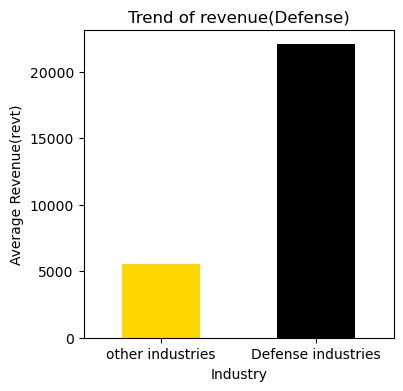

In [58]:
import matplotlib.pyplot as plt

comparison1['revt'].plot(kind='bar', color=['gold','black'],figsize=(4,4))
plt.title("Trend of revenue(Defense)")
plt.xlabel("Industry")
plt.ylabel("Average Revenue(revt)")
plt.xticks(rotation=0)
plt.show()

**Trend of Car**

In [60]:
#Comparing Defense Industry by CAR with other Industries

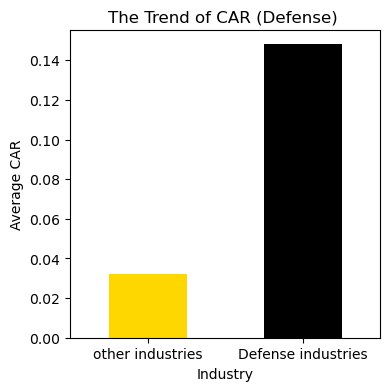

In [61]:
comparison1['car'].plot(kind='bar', color=['gold', 'black'], figsize=(4, 4))
plt.title("The Trend of CAR (Defense) ")
plt.xlabel("Industry")
plt.ylabel("Average CAR")
plt.xticks(rotation=0)
plt.show()

**CORRELATION**

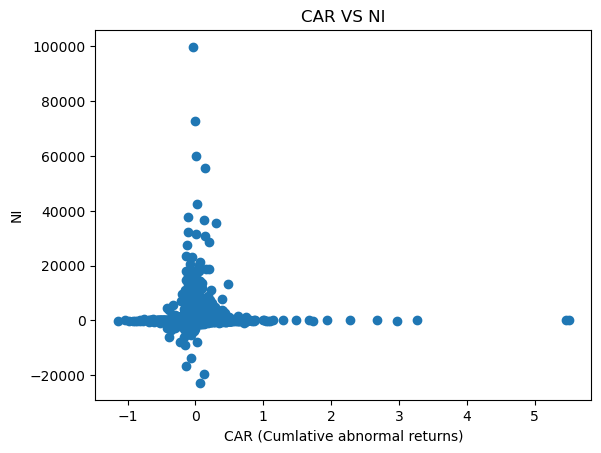

In [63]:
#Analysing the correlation between CAR and other control variables
plt.scatter(crsp_comp['car'],crsp_comp['ni'])
plt.xlabel('CAR (Cumlative abnormal returns)')
plt.ylabel('NI')
plt.title('CAR VS NI')
plt.show()

**REGRESSION**

In [65]:
#Regression analysis with "ni"

In [66]:
import statsmodels.formula.api as smf

model = smf.ols(formula='ni ~ Defense', data=crsp_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     ni   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5608
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.454
Time:                        23:31:36   Log-Likelihood:                -46573.
No. Observations:                4917   AIC:                         9.315e+04
Df Residuals:                    4915   BIC:                         9.316e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         504.7300     44.844     

In [67]:
#Analysing the regression relationship between 'bhar', 'Defense' and 'log_revt'
model = smf.ols(formula='bhar ~ Defense+log_revt', data=crsp_comp)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   bhar   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.031
Date:                Tue, 15 Apr 2025   Prob (F-statistic):              0.357
Time:                        23:31:36   Log-Likelihood:                -505.89
No. Observations:                4902   AIC:                             1018.
Df Residuals:                    4899   BIC:                             1037.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0443      0.008     

In [68]:
#Regression Analysis using "car", “log_revt”, and industry dummies

In [69]:
crsp_comp['sic2'] = (crsp_comp['siccd']/100).astype(int)
model=smf.ols(formula='car~Defense+C(sic2)+log_revt',data=crsp_comp)

In [70]:
import numpy as np
crsp_comp = crsp_comp.dropna()  
crsp_comp = crsp_comp.replace([np.inf, -np.inf], np.nan).dropna()  
crsp_comp['sic2'] = ((crsp_comp['siccd'] / 100).astype(int) + 1e-6)
model = smf.ols(formula='car ~ Defense + C(sic2) + log_revt', data=crsp_comp)

In [71]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    car   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     8.386
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           5.13e-79
Time:                        23:31:36   Log-Likelihood:                 411.58
No. Observations:                4818   AIC:                            -677.2
Df Residuals:                    4745   BIC:                            -204.1
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.1042 

In [72]:
#Filtering profitable companies and fitting an OLS regression model to examine the impact of Defense and log_revt on car.

In [73]:
crsp_comp_profit=crsp_comp[(crsp_comp['ni']>=0)]

In [74]:
model = smf.ols(formula='car ~ Defense+log_revt', data=crsp_comp_profit)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    car   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     24.09
Date:                Tue, 15 Apr 2025   Prob (F-statistic):           4.26e-11
Time:                        23:31:36   Log-Likelihood:                 1179.3
No. Observations:                2679   AIC:                            -2353.
Df Residuals:                    2676   BIC:                            -2335.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1125      0.010     

In [75]:
#   Pickle File Github Link
#   URL= https://github.com/pragathi-somashekar/Financial-Data-Analysis-and-Visualization/blob/main/code.pkl